<a href="https://colab.research.google.com/github/Clamepending/dataExtractionRealsenseD435/blob/master/RGBtoDepth(preperation).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import scipy.ndimage
import cv2
%matplotlib inline
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


depth77.npy
depth78.npy
RGB77.png
RGB79.png
depth79.npy
depth76.npy
RGB76.png
RGB78.png
RGB81.png
RGB80.png
depth83.npy
<class 'numpy.ndarray'>


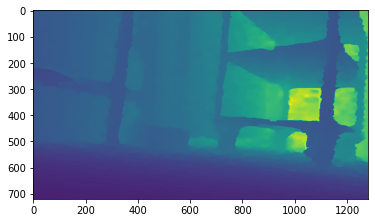

In [ ]:
# instances = []
# depth_data = []
# # Load in the images
# count = 0
# for filepath in os.listdir():
#   count += 1
#   print(filepath)
#   if(filepath.endswith('.npy')):
#     depth_data.append(np.load(filepath))
#   else:
#     instances.append(cv2.imread(filepath,0))
#   if(count > 10):
#     break
  
# print(type(depth_data[0]))
# plt.imshow(depth_data[0])


In [ ]:
# Imports depth data into depth_data array
npy_list = sorted(glob.glob('/content/drive/MyDrive/RGB_and_Depth_Data/NiceData/Doorway_Hallway_Room/*.npy'))
depth_data = np.empty((len(npy_list), 720, 1280), dtype=np.int32)
count = 0
for depthimagepath in npy_list:
    depth_data[count] = np.load(depthimagepath)
    count += 1

NameError: ignored

In [ ]:
# Imports RGB data into RGB_data array
from google.colab.patches import cv2_imshow
img_list = sorted(glob.glob('/content/drive/MyDrive/RGB_and_Depth_Data/NiceData/Doorway_Hallway_Room/*.png'))
RGB_data = np.empty((len(img_list), 720, 1280, 3), dtype=np.int32)
count = 0
for RGBimagepath in img_list:
    RGB_data[count] = cv2.imread(RGBimagepath)[:,:,::-1] #read image and convert BGR to RGB
    count += 1

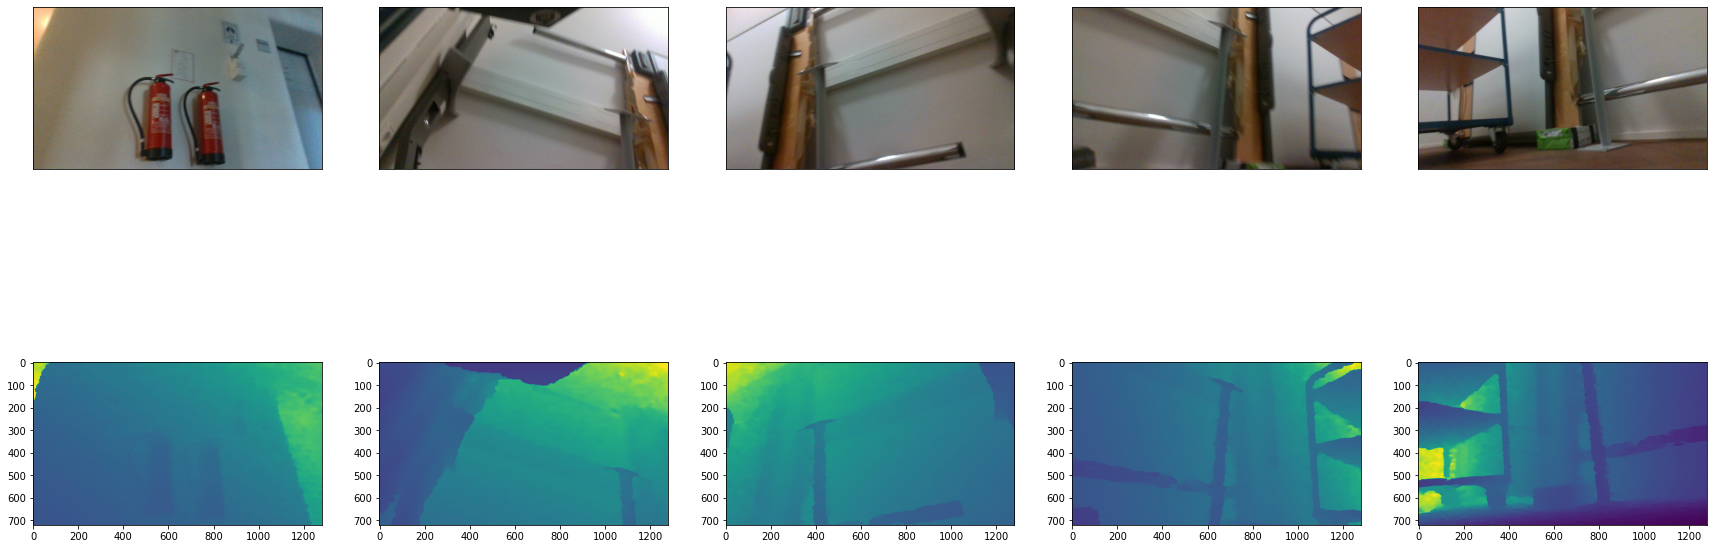

In [ ]:
#Check if data and label is right
plt.figure(figsize=(30,12))
for i in range(5):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(RGB_data[5*i])
    plt.subplot(2,5,i+6)
    plt.imshow(depth_data[5*i])

In [ ]:
# Resize data
resolution = [160,90]
RGB_data_resized = np.empty((len(RGB_data), resolution[1], resolution[0], 3), dtype=np.int32)
depth_data_resized = np.empty((len(depth_data), resolution[1], resolution[0]), dtype=np.int32)

for i in range(len(RGB_data)):
  RGB_data_resized[i] = RGB_data[i][::2, ::2][::2, ::2][::2, ::2]
  depth_data_resized[i] = depth_data[i][::2, ::2][::2, ::2][::2, ::2]



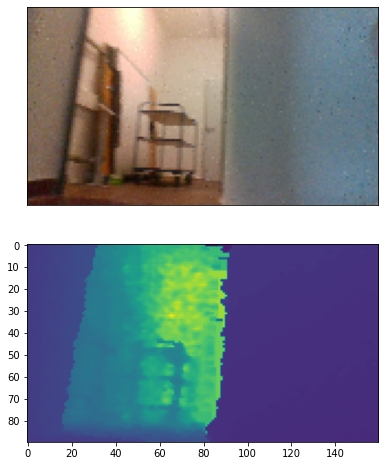

In [ ]:
# check if resized data is correct
plt.figure(figsize=(20,8))
plt.subplot(2,1,1)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(RGB_data_resized[421])
plt.subplot(2,1,2)
plt.imshow(depth_data_resized[421])

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

# Commonly used modules
import numpy as np
import os
import sys

# Images, plots, display, and visualization
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
import IPython
from six.moves import urllib

print(tf.__version__)

2.5.0


In [ ]:
#Build the model

model = keras.Sequential()
# 32 convolution filters used each of size 3x3
model.add(Conv2D(32, kernel_size=(4, 4), activation='relu', input_shape=(90, 160, 3)))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(4, 4)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(64, (4, 4), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))
# 64 convolution filters used each of size 3x3
model.add(Conv2D(128, (4, 4), activation='relu'))
# choose the best features via pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (4, 4), activation='relu'))

model.add(Conv2D(128, (4, 4), activation='relu'))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (2, 2), activation='relu'))

model.add(Conv2D(256, (4, 4), activation='relu'))
model.add(Conv2D(128, (4, 4), activation='relu'))

model.add(Conv2DTranspose(1, (32,32), strides=(32,32), padding='same'))

model.summary()

ValueError: ignored